# GTZAN Test Notebook

This notebook is for providing example of loading gtzan data
* <b>Original Source: </b> https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification?resource=download-directory

* <b>Project Hosting: </b> https://drive.google.com/drive/u/1/folders/1nCQQ7U30c4NuDYzfs0mYDlsAtvBdpfNd

* Code based on mirrowing g-drive folder structure locally in the `music_modeling_capstone/project_data_source/free_music_archive` folder


## LOAD LIBRARY

In [1]:
import pandas as pd
import IPython.display as ipd
import librosa
import matplotlib.pyplot as plt

## LOAD DATA

### gtzan metadata

In [3]:
DATA_PATH = "project_data_source/gtzan_dataset/Data/"

In [5]:
features_3_sec = pd.read_csv(DATA_PATH + 'features_3_sec.csv')
features_3_sec.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [6]:
features_30_sec = pd.read_csv(DATA_PATH + 'features_30_sec.csv')
features_30_sec.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


### gtzan audio files

In [7]:
AUDIO_PATH = "project_data_source/gtzan_dataset/Data/genres_original"

In [23]:
#iterable of file paths - 
file_paths = AUDIO_PATH +'/'+ features_30_sec.label + '/' + features_30_sec.filename
file_paths

0      project_data_source/gtzan_dataset/Data/genres_...
1      project_data_source/gtzan_dataset/Data/genres_...
2      project_data_source/gtzan_dataset/Data/genres_...
3      project_data_source/gtzan_dataset/Data/genres_...
4      project_data_source/gtzan_dataset/Data/genres_...
                             ...                        
995    project_data_source/gtzan_dataset/Data/genres_...
996    project_data_source/gtzan_dataset/Data/genres_...
997    project_data_source/gtzan_dataset/Data/genres_...
998    project_data_source/gtzan_dataset/Data/genres_...
999    project_data_source/gtzan_dataset/Data/genres_...
Length: 1000, dtype: object

In [25]:
file_name = file_paths.iloc[0]
print('File: {}'.format(file_name))

x, sr = librosa.load(file_name, sr=None, mono=True)

print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

File: project_data_source/gtzan_dataset/Data/genres_original/blues/blues.00000.wav
Duration: 30.01s, 661794 samples


In [26]:
start, end = 7, 17
ipd.Audio(data=x[start*sr:end*sr], rate=sr)

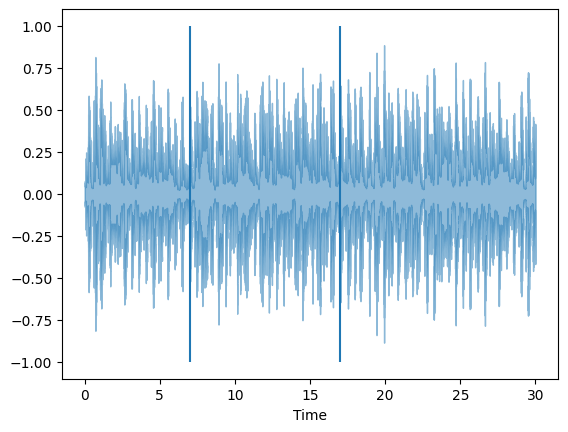

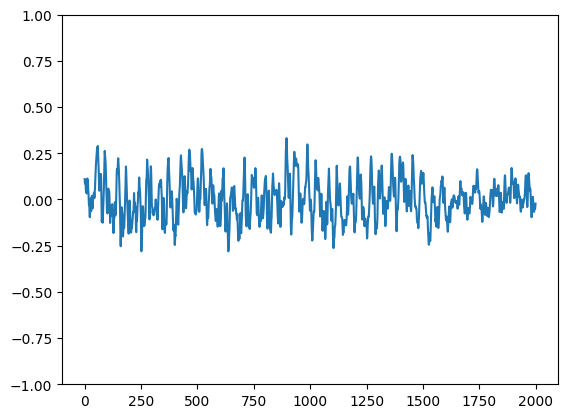

In [27]:
librosa.display.waveshow(x, sr=sr, alpha=0.5);
plt.vlines([start, end], -1, 1)

start = len(x) // 2
plt.figure()
plt.plot(x[start:start+2000])
plt.ylim((-1, 1));

In [9]:

features_3_sec.filename

0       blues.00000.0.wav
1       blues.00000.1.wav
2       blues.00000.2.wav
3       blues.00000.3.wav
4       blues.00000.4.wav
              ...        
9985     rock.00099.5.wav
9986     rock.00099.6.wav
9987     rock.00099.7.wav
9988     rock.00099.8.wav
9989     rock.00099.9.wav
Name: filename, Length: 9990, dtype: object